In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [152]:
df=pd.read_csv("/content/Churn_Modelling.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [153]:
df.shape

(10000, 14)

In [154]:
# Unwanted columns are dropped ['RowNumber','CustomerId','Surname']
df.drop(['RowNumber','CustomerId','Surname'],axis=1,inplace=True)

In [155]:
df.head(3)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1


In [156]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [157]:
# Converting object datatype to int by labelencider
df.Gender.unique(),df.Geography.unique()

(array(['Female', 'Male'], dtype=object),
 array(['France', 'Spain', 'Germany'], dtype=object))

In [158]:
label_en=LabelEncoder()

In [159]:

def encoding(df,features):
  df[features]=label_en.fit_transform(df[features])

In [160]:
encoding(df,'Gender')
encoding(df,'Geography')
df.Gender.unique(),df.Geography.unique()

(array([0, 1]), array([0, 2, 1]))

In [161]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  int64  
 2   Gender           10000 non-null  int64  
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9)
memory usage: 859.5 KB


In [162]:
X=df.iloc[:,:10]
y=df.Exited       

In [163]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,0,0,42,2,0.00,1,1,1,101348.88
1,608,2,0,41,1,83807.86,1,0,1,112542.58
2,502,0,0,42,8,159660.80,3,1,0,113931.57
3,699,0,0,39,1,0.00,2,0,0,93826.63
4,850,2,0,43,2,125510.82,1,1,1,79084.10


In [164]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

In [165]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=10)

In [166]:
X_train.shape, X_test.shape

((7000, 10), (3000, 10))

In [167]:
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [168]:
model=Sequential()
model.add(Dense(32,input_dim=10))
model.add(Dense(32))
model.add(Dense(1,activation='sigmoid'))
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 32)                352       
_________________________________________________________________
dense_17 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_18 (Dense)             (None, 1)                 33        
Total params: 1,441
Trainable params: 1,441
Non-trainable params: 0
_________________________________________________________________


In [169]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [170]:
history=model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=20)

Epoch 1/20
219/219 [==============================] - 1s 3ms/step - loss: 1086.2113 - accuracy: 0.6454 - val_loss: 337.5486 - val_accuracy: 0.7933
Epoch 2/20
219/219 [==============================] - 0s 2ms/step - loss: 321.0100 - accuracy: 0.6621 - val_loss: 420.6707 - val_accuracy: 0.5740
Epoch 3/20
219/219 [==============================] - 0s 2ms/step - loss: 268.2883 - accuracy: 0.6741 - val_loss: 171.2348 - val_accuracy: 0.7933
Epoch 4/20
219/219 [==============================] - 0s 2ms/step - loss: 277.2206 - accuracy: 0.6829 - val_loss: 219.9894 - val_accuracy: 0.7840
Epoch 5/20
219/219 [==============================] - 0s 2ms/step - loss: 274.9316 - accuracy: 0.6791 - val_loss: 162.7061 - val_accuracy: 0.6793
Epoch 6/20
219/219 [==============================] - 0s 2ms/step - loss: 253.1925 - accuracy: 0.6749 - val_loss: 75.4982 - val_accuracy: 0.5803
Epoch 7/20
219/219 [==============================] - 1s 2ms/step - loss: 251.2227 - accuracy: 0.6869 - val_loss: 289.2022 -

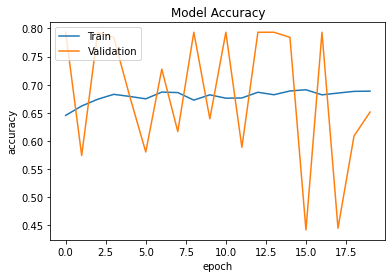

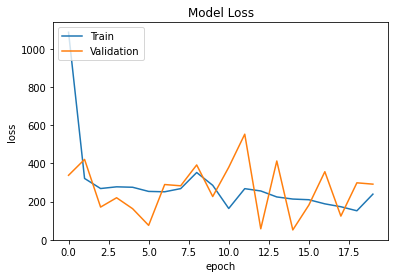

In [171]:
# Accuracy Plot

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['Train','Validation'],loc='upper left')
plt.show()

# Loss Plot

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['Train','Validation'],loc='upper left')
plt.show()

In [172]:
prediction=np.round(model.predict(X_test))

In [173]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [174]:
accuracy_score(y_test,prediction)

0.6513333333333333

In [175]:
confusion_matrix(y_test,prediction)

array([[1855,  525],
       [ 521,   99]])

In [176]:
from sklearn.metrics import classification_report

In [178]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.78      0.78      0.78      2380
           1       0.16      0.16      0.16       620

    accuracy                           0.65      3000
   macro avg       0.47      0.47      0.47      3000
weighted avg       0.65      0.65      0.65      3000



# Improvements
1. Add in class weight to handle imbalance
2. Increase units in dense layers and also increase number of layers
3. Add BatchNormalization to layers.
4. Add Dropout to layers

In [137]:
from sklearn.utils.class_weight import compute_class_weight

In [138]:
class_weights=compute_class_weight(class_weight='balanced',classes=np.unique(y_train), y=y_train)
class_weights

array([0.6269031 , 2.47000706])

In [139]:
class_weights={i:k for i,k in enumerate(class_weights)}
class_weights

{0: 0.6269030986924593, 1: 2.4700070571630204}

In [140]:
from tensorflow.keras.layers import Dense,Dropout,Activation,BatchNormalization
model2=Sequential()
model2.add(tensorflow.keras.Input(shape=(10,)))
model2.add(BatchNormalization())
model2.add(Dense(128,activation='relu'))
model2.add(Dropout(0.2))
model2.add(BatchNormalization())
model2.add(Dense(64,activation='relu'))
model2.add(Dropout(0.2))
model2.add(BatchNormalization())
model2.add(Dense(32,activation='relu'))
model2.add(Dense(1,activation='sigmoid'))

model2.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization (BatchNo (None, 10)                40        
_________________________________________________________________
dense_12 (Dense)             (None, 128)               1408      
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 128)               512       
_________________________________________________________________
dense_13 (Dense)             (None, 64)                8256      
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 64)               

In [142]:
model2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [143]:
history2=model2.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=20,class_weight=class_weights)

Instructions for updating:
The `validate_indices` argument has no effect. Indices are always validated on CPU and never validated on GPU.
Epoch 1/20
219/219 [==============================] - 2s 4ms/step - loss: 0.6377 - accuracy: 0.6399 - val_loss: 0.6152 - val_accuracy: 0.6703
Epoch 2/20
219/219 [==============================] - 1s 3ms/step - loss: 0.5479 - accuracy: 0.7127 - val_loss: 0.5075 - val_accuracy: 0.7353
Epoch 3/20
219/219 [==============================] - 1s 3ms/step - loss: 0.5230 - accuracy: 0.7343 - val_loss: 0.4738 - val_accuracy: 0.7720
Epoch 4/20
219/219 [==============================] - 1s 3ms/step - loss: 0.5067 - accuracy: 0.7521 - val_loss: 0.4764 - val_accuracy: 0.7683
Epoch 5/20
219/219 [==============================] - 1s 3ms/step - loss: 0.4996 - accuracy: 0.7427 - val_loss: 0.4683 - val_accuracy: 0.7673
Epoch 6/20
219/219 [==============================] - 1s 4ms/step - loss: 0.4957 - accuracy: 0.7573 - val_loss: 0.4552 - val_accuracy: 0.7797
Epoch 7/20

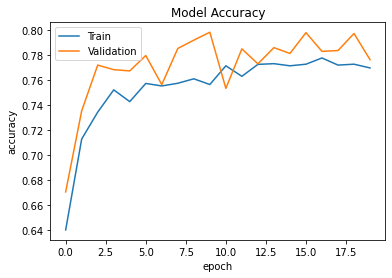

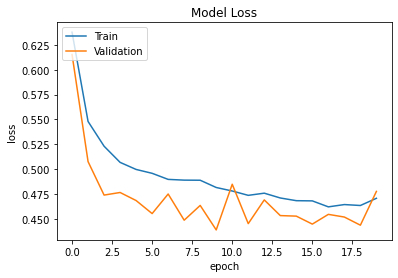

In [145]:
# Accuracy Plot

plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['Train','Validation'],loc='upper left')
plt.show()

# Loss Plot

plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['Train','Validation'],loc='upper left')
plt.show()

In [146]:
prediction2=np.round(model2.predict(X_test))

In [147]:
accuracy_score(y_test,prediction2)

0.7763333333333333

In [148]:
confusion_matrix(y_test,prediction2)

array([[1860,  520],
       [ 151,  469]])

In [151]:
print(classification_report(y_test,prediction2))

              precision    recall  f1-score   support

           0       0.92      0.78      0.85      2380
           1       0.47      0.76      0.58       620

    accuracy                           0.78      3000
   macro avg       0.70      0.77      0.72      3000
weighted avg       0.83      0.78      0.79      3000

